In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
p_price = pd.read_excel('Dataset.xlsx')
p_price.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
p_price.shape       # Shape of Data

(30471, 292)

In [ ]:
report = p_price.profile_report(title='Pandas Profiling before Data Preprocessing')
report.to_file(output_file="data_before_preprocessing.html")

In [4]:
p_price.drop('id',axis=1,inplace=True)

In [5]:
p_price_dtype = p_price.dtypes.reset_index()
p_price_dtype.columns = ['Count', 'Column Type']
p_price_dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,datetime64[ns],1
1,int64,156
2,float64,119
3,object,15


###### There are 15 Object Feature in the data set

In [6]:
cat_fea = list(p_price.select_dtypes(include=['object']))
cat_fea

['product_type',
 'sub_area',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [7]:
for i in cat_fea:
    print(p_price[i].unique(),i,'\n')

['Investment' 'OwnerOccupier'] product_type 

['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' "Sokol'niki" 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'Obruchevskoe' 'Filevskij Park'
 'Troparevo-Nikulino' 'Severnoe Butovo' 'Hamovniki' 'Solncevo'
 'Dorogomilo

In [8]:
p_price.isnull().sum().sum()

261026

# Missing values

In [9]:
null_values_per = p_price.isnull().sum() * 100/ len(p_price)
missing_values = pd.DataFrame({
                                'Columns Name' : p_price.columns,
                                'Null Value Percentage' : null_values_per})

In [10]:
missing_values.sort_values('Null Value Percentage',ascending=False,inplace = True)
missing_values_new = missing_values[missing_values['Null Value Percentage']>0]
missing_values_new

,Columns Name,Null Value Percentage
hospital_beds_raion,hospital_beds_raion,47.392603
build_year,build_year,44.649011
state,state,44.498047
cafe_avg_price_500,cafe_avg_price_500,43.585704
cafe_sum_500_max_price_avg,cafe_sum_500_max_price_avg,43.585704
cafe_sum_500_min_price_avg,cafe_sum_500_min_price_avg,43.585704
max_floor,max_floor,31.413475
material,material,31.413475
num_room,num_room,31.413475
kitch_sq,kitch_sq,31.413475


(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text xticklabel objects>)

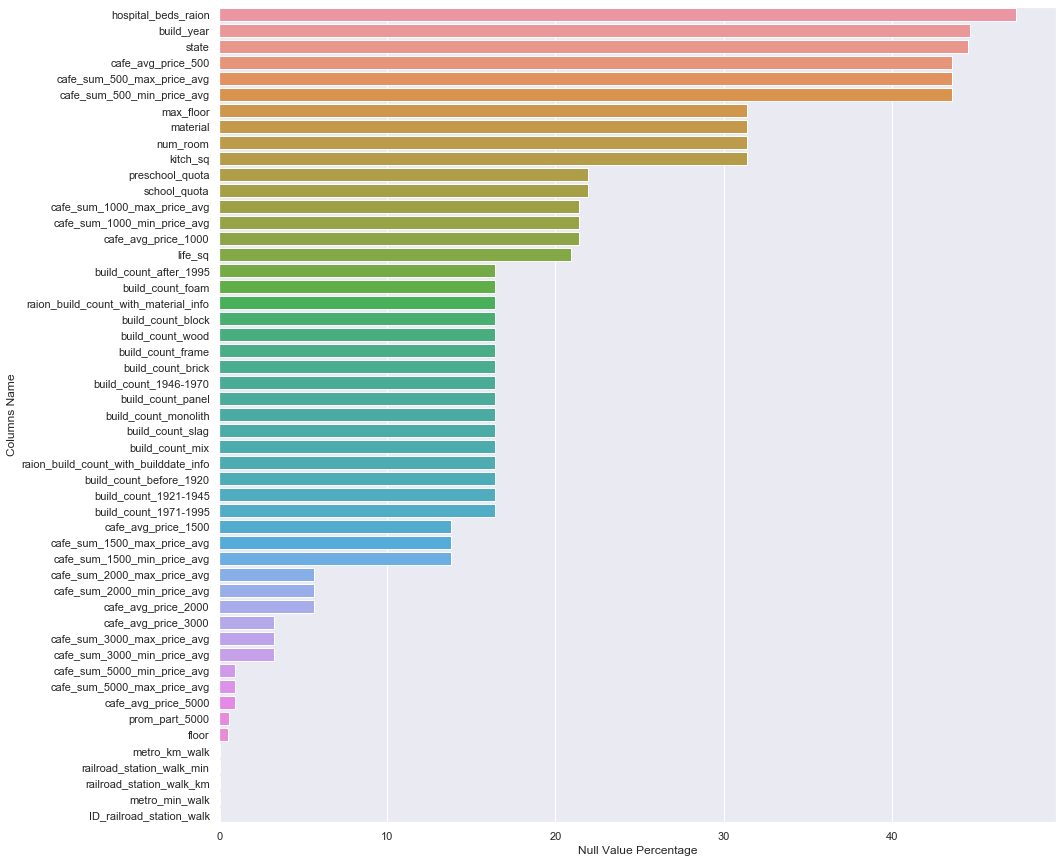

In [40]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(y='Columns Name', x='Null Value Percentage', data=missing_values_new)
plt.xticks(rotation='horizontal')

We can see the independent variables where the data are partially empty

In [13]:
na_col = p_price.columns[p_price.isna().any()].tolist()
na_col

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

In [15]:
len(na_col) * 100/ len(p_price.columns)

17.52577319587629

 Total 17 % data have null Values

## Distribution price_doc / log_price_doc

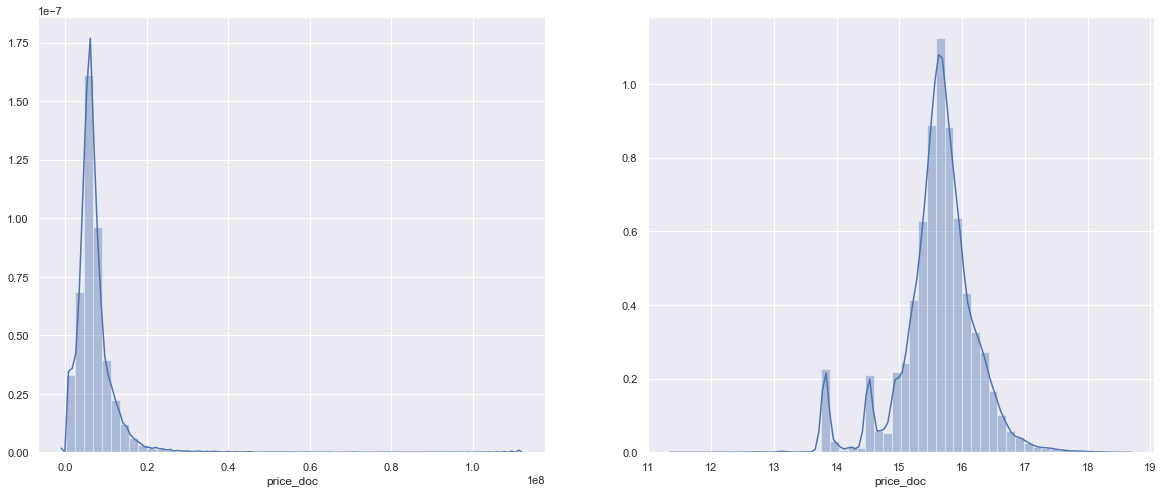

In [55]:
def price_graph():
    fig,ax = plt.subplots(1,2, figsize=(20,8))
    ax1,ax2 = ax.flatten()
    
    sns.distplot(p_price["price_doc"],ax = ax1)
    
    sns.distplot(np.log(p_price["price_doc"]),ax = ax2)
    plt.subplots_adjust(wspace=0.2)
    
price_graph()

#### price_doc is right skewed where as log of price_doc is like a normal distribution

## Correlation between Features

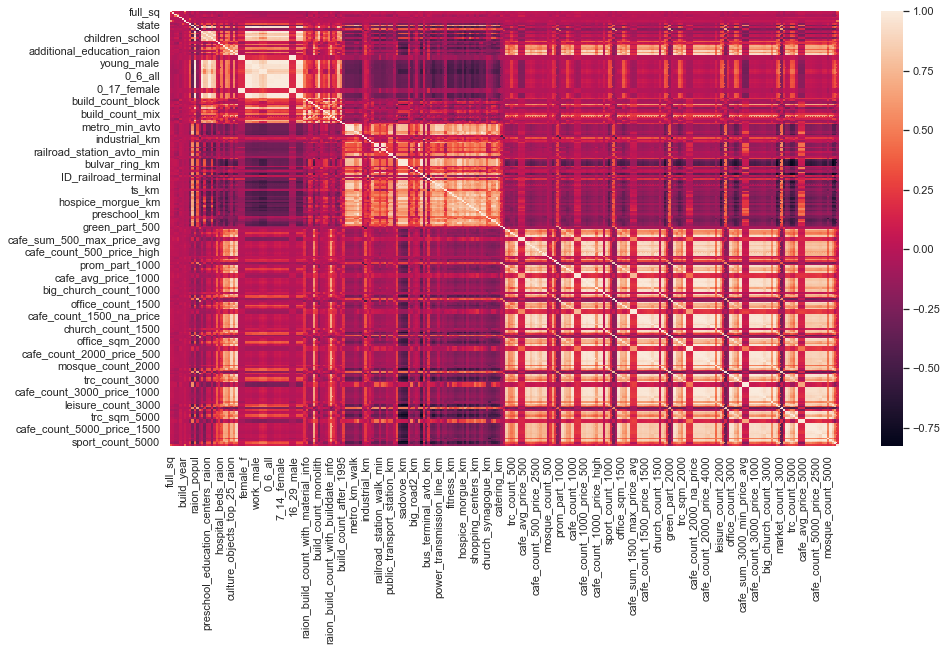

In [16]:
corr_matrix = p_price.corr()
sns.heatmap(corr_matrix)


It shows that the independent variables of high correlation are grouped around.

In [17]:
p_price_price_corr = p_price.dropna().corr()[['price_doc']]
p_price_price_corr.sort_values('price_doc',ascending= False).head(20).head(15)

,price_doc
price_doc,1.000000
full_sq,0.675455
life_sq,0.524602
num_room,0.478370
kitch_sq,0.368339
office_sqm_5000,0.271088
cafe_count_5000_price_high,0.260564
cafe_count_5000_price_2500,0.260002
ID_metro,0.257857
cafe_count_5000_price_1500,0.257182


We seet that full_sq, life_sq,num_room, kitch_room are corelated with target variable

In [20]:
p_price.timestamp.dtype

dtype('<M8[ns]')

In [21]:
p_price["month"] = p_price["timestamp"].dt.month
p_price["year"] = p_price["timestamp"].dt.year

# Relationship between Independent Variable and Price

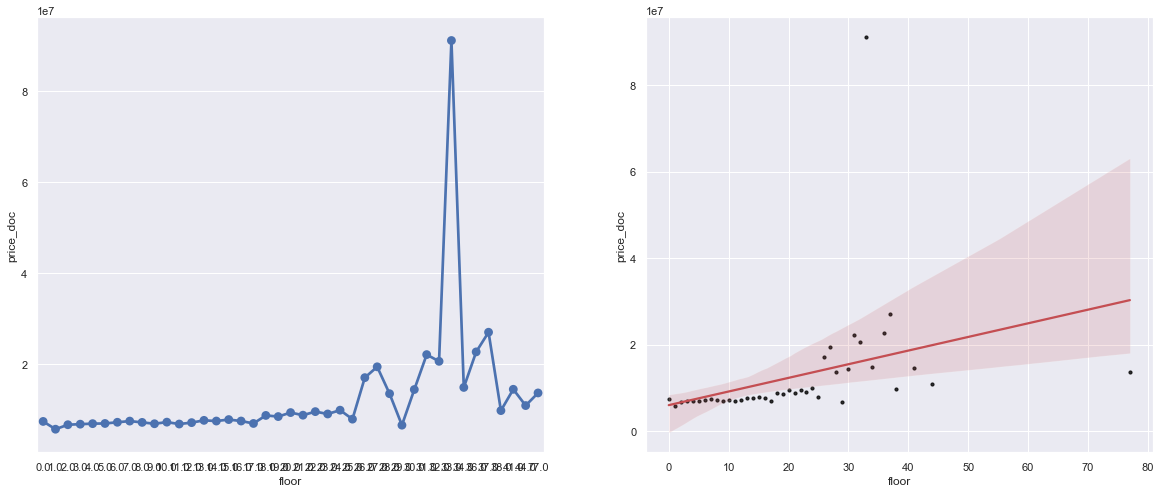

<Figure size 720x360 with 0 Axes>

In [63]:
# For floor
#floor_price = p_price.groupby("floor")["price_doc"].mean().reset_index()
#plt.figure(figsize= (10,5))
#sns.pointplot(x = floor_price.floor, y= floor_price.price_doc)
#plt.show()

fig,ax = plt.subplots(1,2, figsize=(20,8))
ax1,ax2 = ax.flatten()
floor_price = p_price.groupby("floor")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,5))
sns.pointplot(x = floor_price.floor.dropna(), y= floor_price.price_doc,ax=ax1)
sns.regplot(x = floor_price.floor.dropna(), y= floor_price.price_doc, ax=ax2, 
            scatter_kws={"s": 10, "color":"black"}, line_kws={"color":"r"})    
plt.subplots_adjust(wspace=0.2)

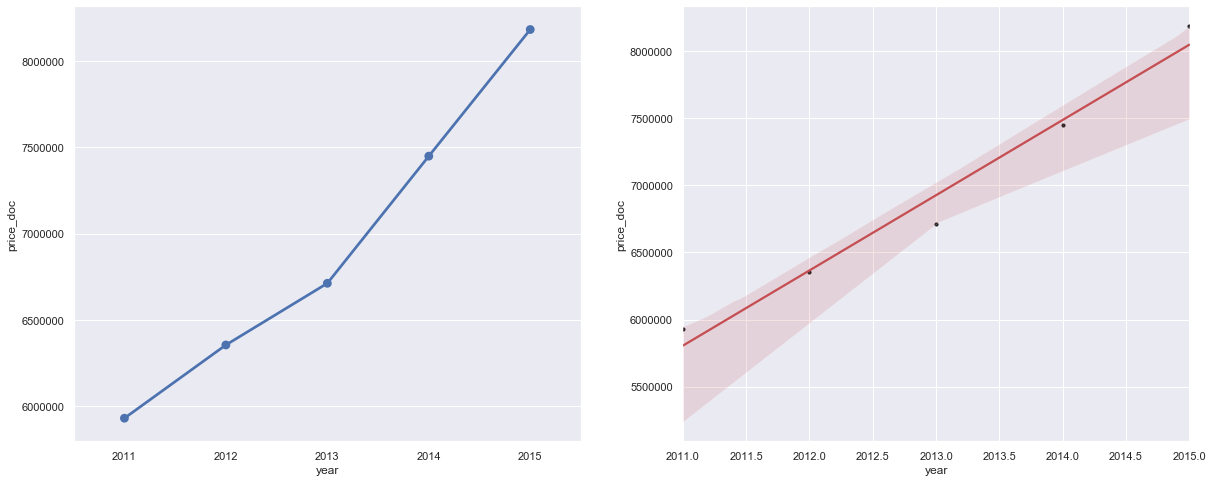

<Figure size 720x360 with 0 Axes>

In [64]:
fig,ax = plt.subplots(1,2, figsize=(20,8))
ax1,ax2 = ax.flatten()
floor_price = p_price.groupby("year")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,5))
sns.pointplot(x = floor_price.year.dropna(), y= floor_price.price_doc,ax=ax1)
sns.regplot(x = floor_price.year.dropna(), y= floor_price.price_doc, ax=ax2, 
            scatter_kws={"s": 10, "color":"black"}, line_kws={"color":"r"})    
plt.subplots_adjust(wspace=0.2)

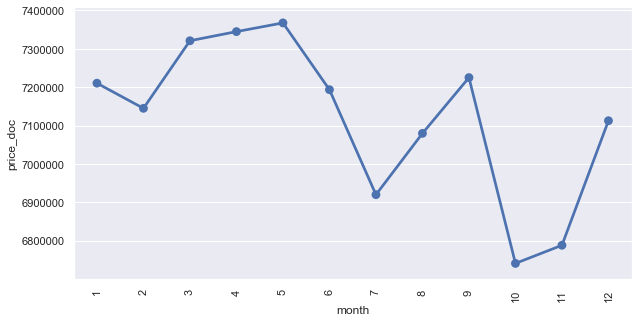

In [43]:
# for month by mean
floor_price_month = p_price.groupby(["month"])["price_doc"].mean().reset_index()
plt.figure(figsize= (10,5))
sns.pointplot(x = floor_price_month.month, y= floor_price_month.price_doc)
plt.xticks(rotation = 90)
plt.show()



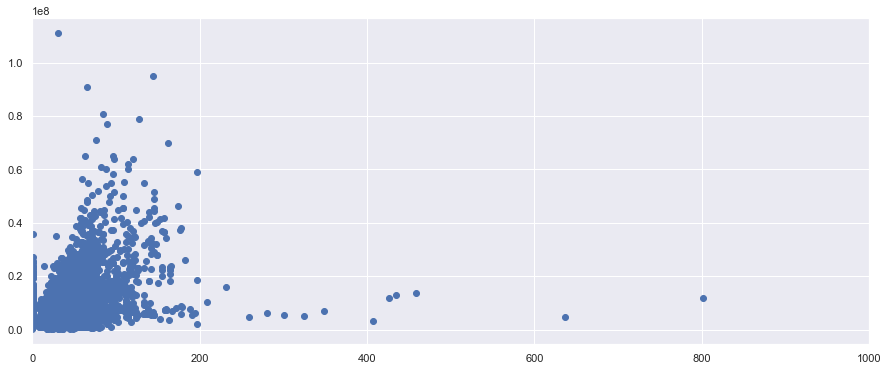

In [69]:
# for life_sq
plt.figure(figsize= (15,6))
plt.scatter(x = p_price.life_sq, y = p_price.price_doc)
plt.xlim(0, 1000)
plt.show()



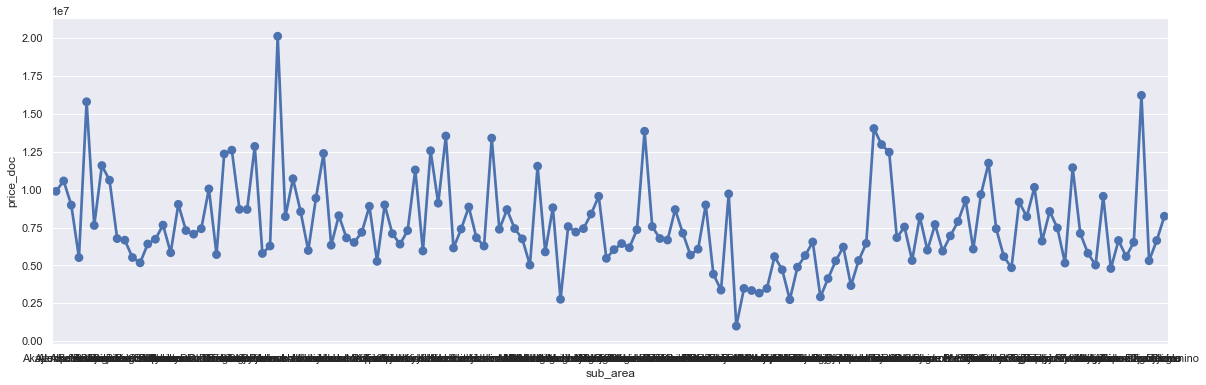

In [27]:
# for sub_area by mean
sub_area_price_area = p_price.groupby("sub_area")["price_doc"].mean().reset_index()
plt.figure(figsize= (20,6))
sns.pointplot(x = sub_area_price_area.sub_area, y= sub_area_price_area.price_doc)
plt.show()

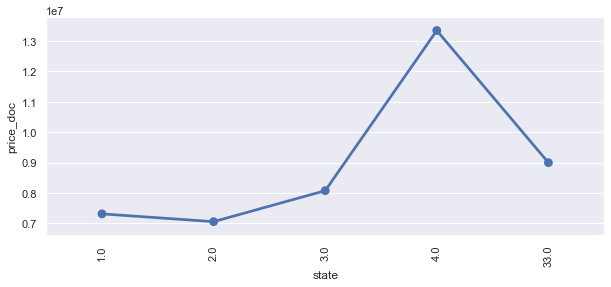

In [71]:
# for state by mean
state_price = p_price.groupby("state")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,4))
sns.pointplot(x = state_price.state, y= state_price.price_doc)
plt.xticks(rotation = 90)
plt.show()

In [29]:
p_price["state"].value_counts()

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

In [30]:
p_price[p_price['state'] == 33]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,month,year
10089,2013-08-27,37,16.0,8.0,12.0,1.0,20052009.0,1.0,9.0,33.0,...,2,10,31,2,7,91,11,9000000,8,2013


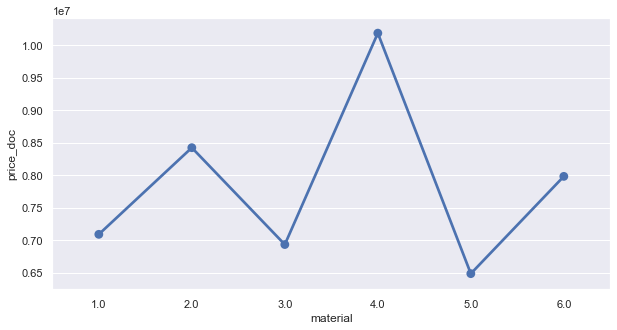

In [31]:
# for material by mean
material_price = p_price.groupby("material")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,5))
sns.pointplot(x = material_price.material, y= material_price.price_doc)
#plt.xticks(rotation = 180)
plt.show()

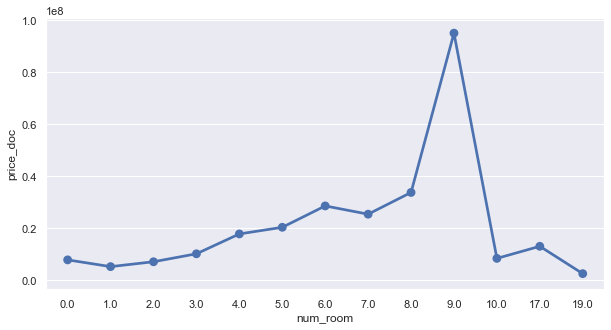

In [32]:
# for room by mean
room_price = p_price.groupby("num_room")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,5))
sns.pointplot(x = room_price.num_room, y= room_price.price_doc)
plt.show()

In [49]:
p_price._get_numeric_data().columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'area_m',
       ...
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc', 'month', 'year'],
      dtype='object', length=277)

In [61]:
notnull_values_per = p_price.notnull().sum() * 100/ len(p_price)
not_missing_values = pd.DataFrame({
                                'Columns Name' : p_price.columns,
                                'NotNull Value Percentage' : notnull_values_per})

not_missing_values.sort_values('NotNull Value Percentage',inplace = True)
not_missing_values_new = not_missing_values[not_missing_values['NotNull Value Percentage']>90]
not_missing_values_new.head(10)

,Columns Name,NotNull Value Percentage
cafe_avg_price_2000,cafe_avg_price_2000,94.338880
cafe_sum_2000_max_price_avg,cafe_sum_2000_max_price_avg,94.338880
cafe_sum_2000_min_price_avg,cafe_sum_2000_min_price_avg,94.338880
cafe_sum_3000_min_price_avg,cafe_sum_3000_min_price_avg,96.747727
cafe_avg_price_3000,cafe_avg_price_3000,96.747727
cafe_sum_3000_max_price_avg,cafe_sum_3000_max_price_avg,96.747727
cafe_sum_5000_max_price_avg,cafe_sum_5000_max_price_avg,99.025303
cafe_sum_5000_min_price_avg,cafe_sum_5000_min_price_avg,99.025303
cafe_avg_price_5000,cafe_avg_price_5000,99.025303
prom_part_5000,prom_part_5000,99.415838


In [76]:
corrs = sorted([(p_price['price_doc'].corr(p_price[f]), f) 
                for f in p_price._get_numeric_data().columns.drop('price_doc')], reverse=True)[:10]
features = [f[1] for f in corrs]

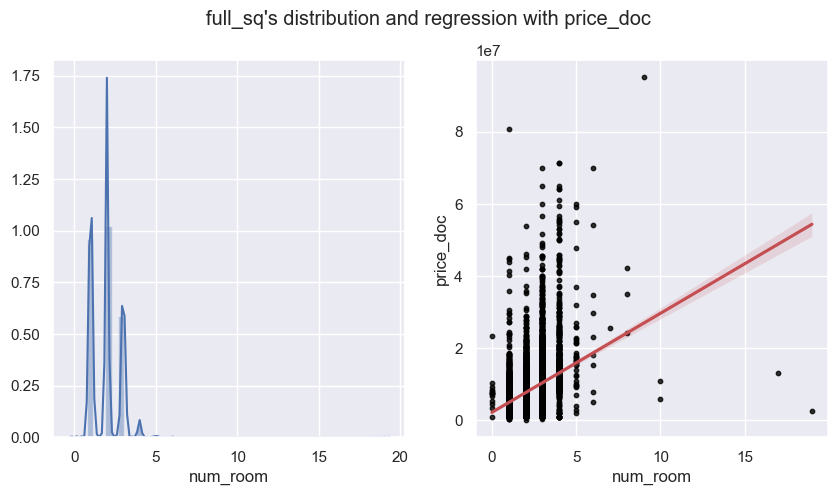

<Figure size 720x360 with 0 Axes>

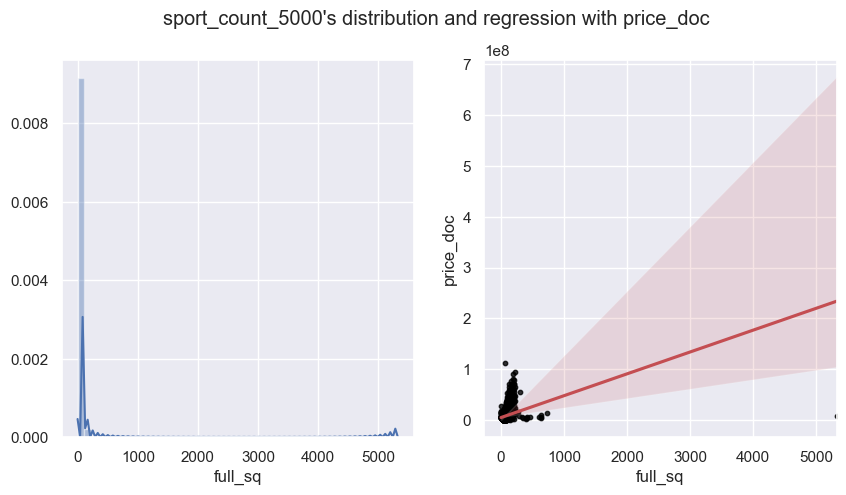

<Figure size 720x360 with 0 Axes>

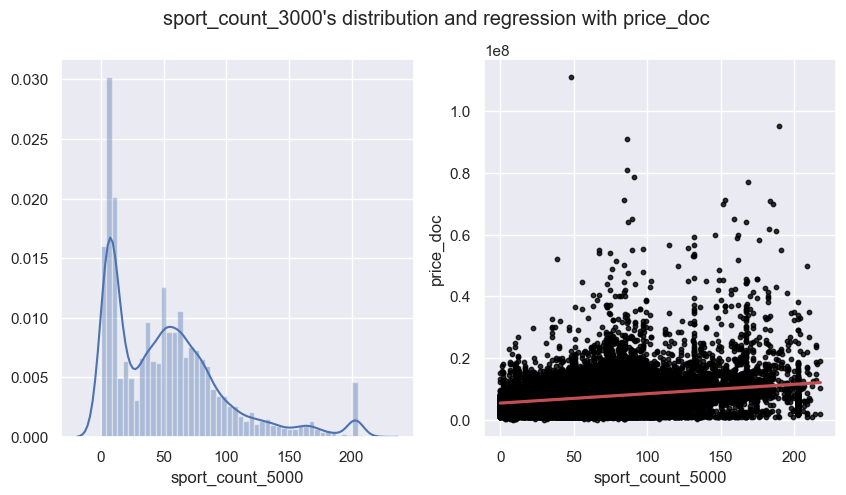

<Figure size 720x360 with 0 Axes>

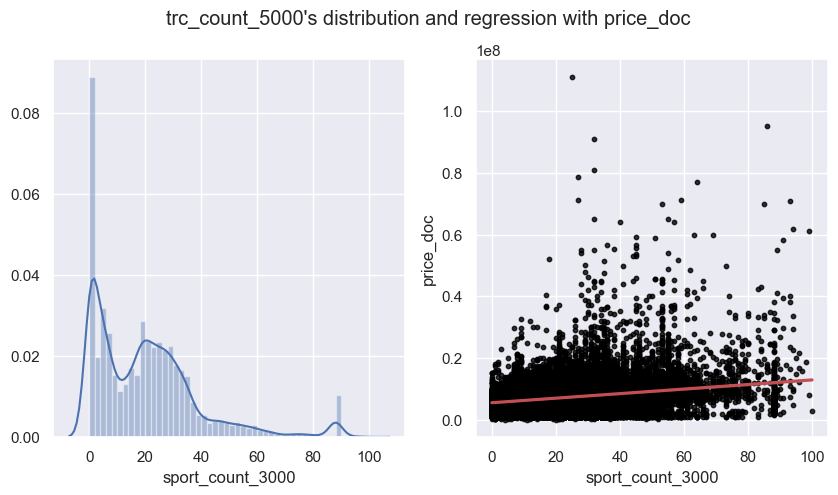

<Figure size 720x360 with 0 Axes>

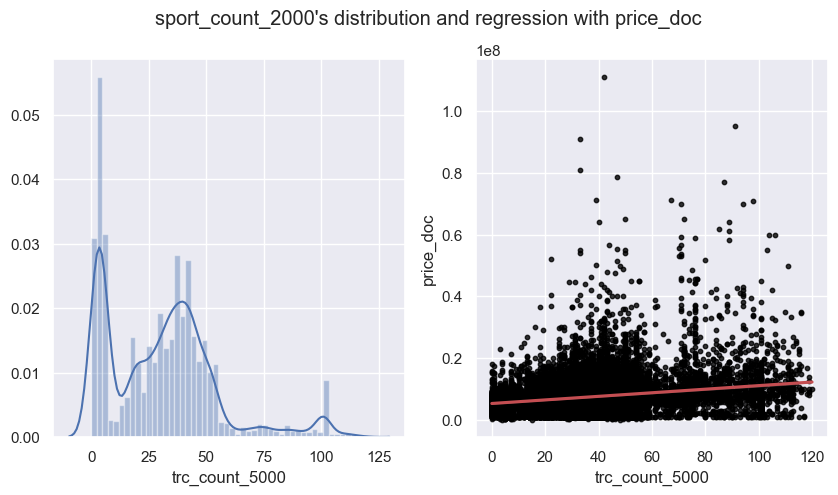

<Figure size 720x360 with 0 Axes>

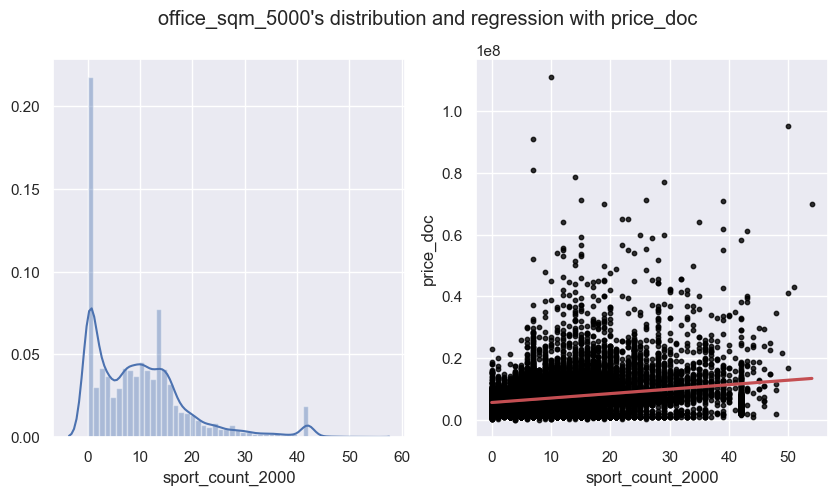

<Figure size 720x360 with 0 Axes>

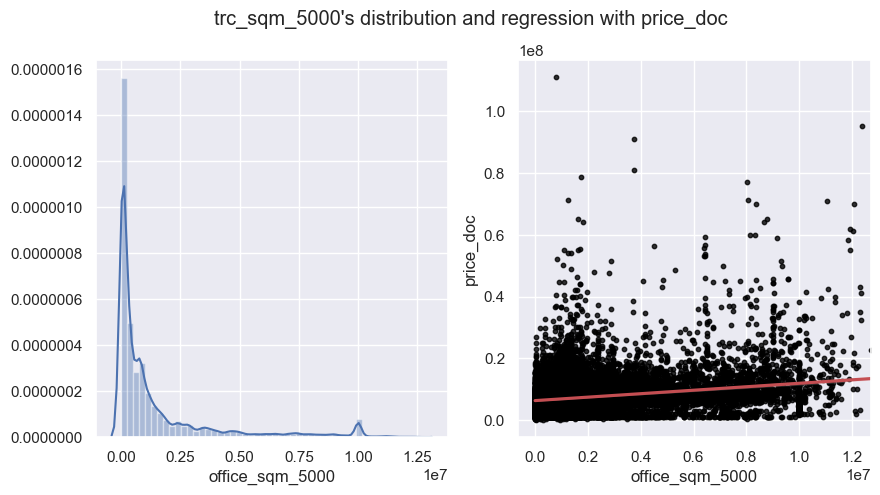

<Figure size 720x360 with 0 Axes>

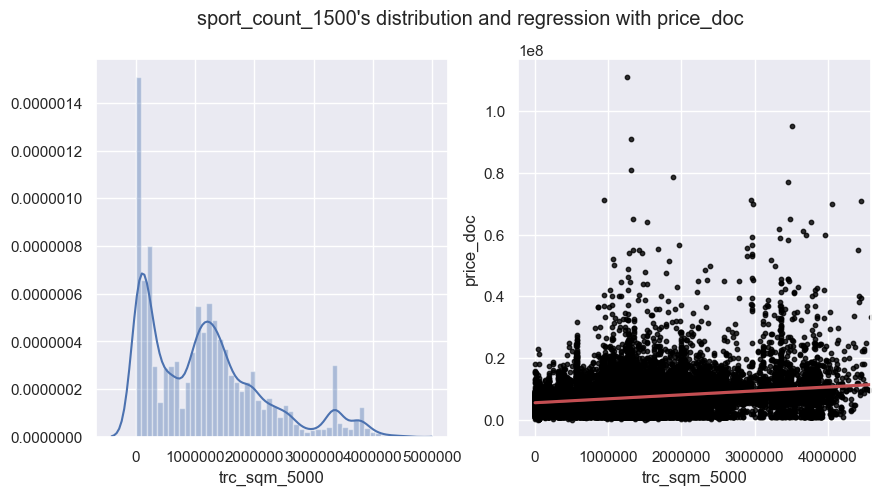

<Figure size 720x360 with 0 Axes>

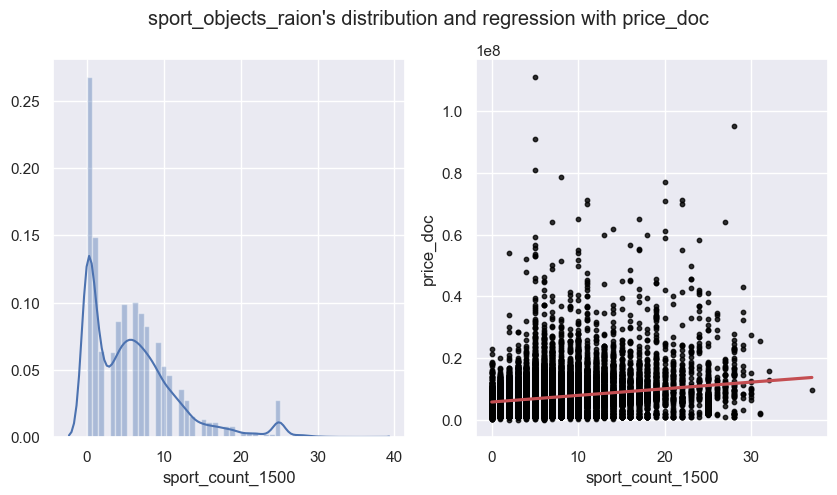

<Figure size 720x360 with 0 Axes>

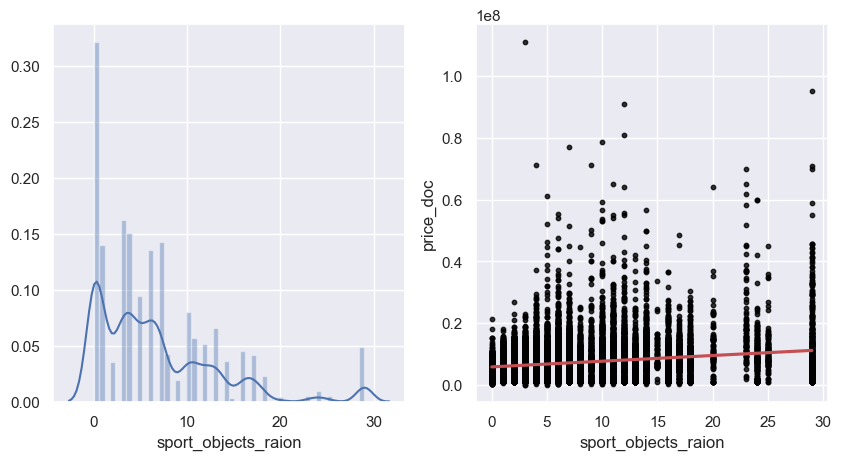

<Figure size 720x360 with 0 Axes>

In [84]:
for i in features:
    fig.suptitle("{}'s distribution and regression with price_doc".format(i))
    fig,ax = plt.subplots(1,2, figsize=(10,5),dpi=100)
    ax1,ax2 = ax.flatten()
    plt.figure(figsize= (10,5))
    sns.distplot(p_price[i].dropna(),ax=ax1)
    sns.regplot(x = p_price[i], y= p_price.price_doc, ax=ax2, 
            scatter_kws={"s": 10, "color":"black"}, line_kws={"color":"r"})    
    plt.subplots_adjust(wspace=0.2)

## categorical feature
     material
     product_type
     ecology

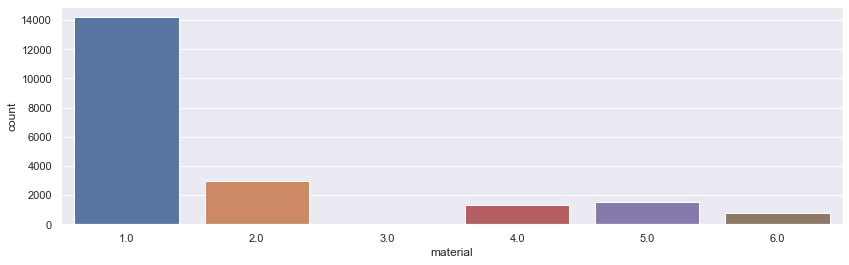

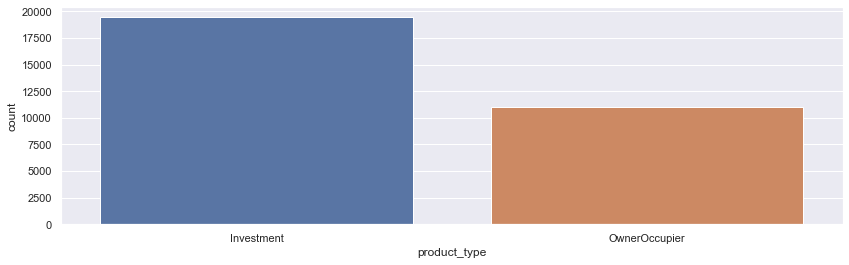

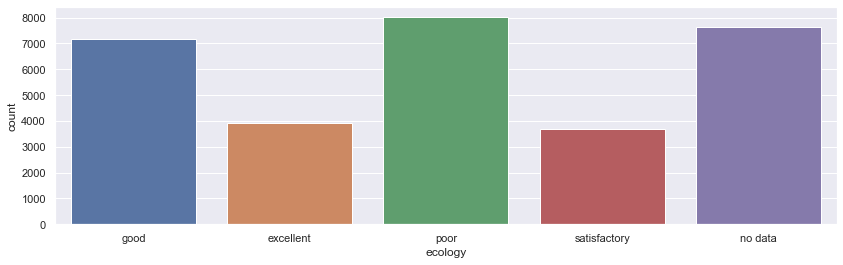

In [33]:
for i in ['material','product_type','ecology']:
    fig = plt.figure(figsize = (14,4))
    axes = fig.add_subplot()
    sns.countplot(p_price[i],ax=axes)

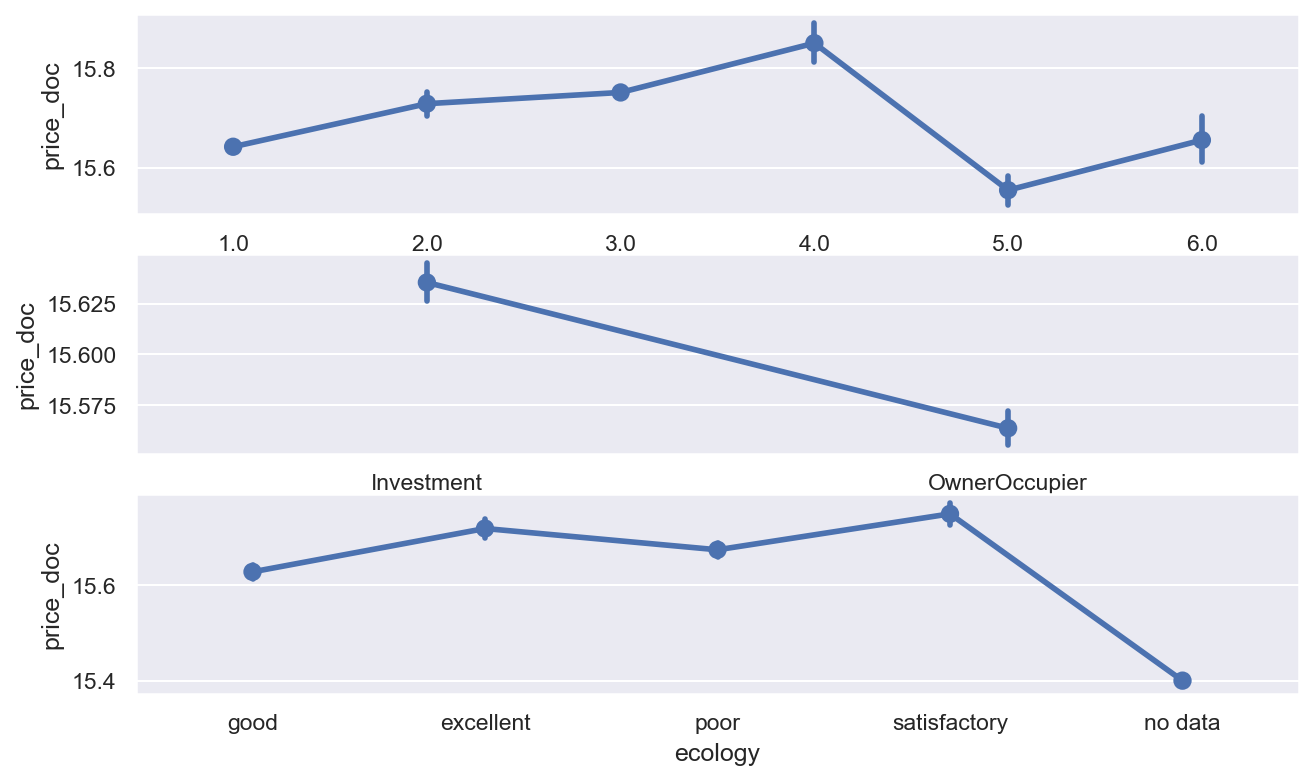

In [121]:
      
fig  = plt.figure(figsize=(10,6),dpi=150)
ax1 = [311,312,313]
lt = ['material','product_type','ecology']
for i in range(0,3):
    ax = fig.add_subplot(ax1[i])
    sns.pointplot(x= p_price[ lt[i]], y=np.log(p_price['price_doc']),ax=ax)
    

In [122]:
id_features = ['ID_metro',
    'ID_railroad_station_walk',
    'ID_big_road1', 
    'ID_big_road2', 
    'ID_railroad_terminal', 
    'ID_bus_terminal']
for i in id_features:
    print(p_price[i].unique(),i,'\n',)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223] ID_metro 

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  